# Credit Card Fraud Detection (Data Analysis & Visualization)
This project explores a real-world credit card transaction dataset to understand and visualize patterns in fraud detection using Python.

We will:
- Load and inspect the dataset
- Preprocess the data (cleaning, scaling, checking class balance)
- Visualize key patterns and features

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving credit_card_fraud_dataset (1).csv to credit_card_fraud_dataset (1).csv


In [ ]:
# Basic libraries for data handling and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# For better plots
sns.set(style='whitegrid')

In [ ]:
# Load the dataset
file_path = "/content/credit_card_fraud_dataset (1).csv"
df = pd.read_csv(file_path)
df.head()#first 5 rows displayed by head

,TransactionID,TransactionDate,Amount,MerchantID,TransactionType,Location,IsFraud
0,1,2024-04-03 14:15:35.462794,4189.27,688,refund,San Antonio,0
1,2,2024-03-19 13:20:35.462824,2659.71,109,refund,Dallas,0
2,3,2024-01-08 10:08:35.462834,784.00,394,purchase,New York,0
3,4,2024-04-13 23:50:35.462850,3514.40,944,purchase,Philadelphia,0
4,5,2024-07-12 18:51:35.462858,369.07,475,purchase,Phoenix,0


In [ ]:
# General info
df.info()
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   TransactionID    100000 non-null  int64  
 1   TransactionDate  100000 non-null  object 
 2   Amount           100000 non-null  float64
 3   MerchantID       100000 non-null  int64  
 4   TransactionType  100000 non-null  object 
 5   Location         100000 non-null  object 
 6   IsFraud          100000 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 5.3+ MB

Missing Values:
TransactionID      0
TransactionDate    0
Amount             0
MerchantID         0
TransactionType    0
Location           0
IsFraud            0
dtype: int64


In [ ]:
# TransactionID doesn't help with fraud detection
df.drop(columns=['TransactionID'], inplace=True)


In [ ]:
# Convert TransactionDate to datetime format, explicitly handling inconsistent formats
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], format='%Y-%m-%d %H:%M', errors='coerce')

# Extract useful time features

import csv

file = open("/content/credit_card_fraud_dataset (1).csv",'r')
rdr = csv.reader(file)
next(rdr)
temp_lst = []
for i in rdr:
  temp_lst.append(i[1].split()[0])

df["TransactionDate"] = temp_lst
df["TransactionDate"] = pd.to_datetime(df["TransactionDate"])
df

,TransactionDate,Amount,MerchantID,TransactionType,Location,IsFraud
0,2024-04-03,4189.27,688,refund,San Antonio,0
1,2024-03-19,2659.71,109,refund,Dallas,0
2,2024-01-08,784.00,394,purchase,New York,0
3,2024-04-13,3514.40,944,purchase,Philadelphia,0
4,2024-07-12,369.07,475,purchase,Phoenix,0
...,...,...,...,...,...,...
99995,2024-06-07,1057.29,289,refund,San Antonio,0
99996,2023-10-22,297.25,745,refund,San Antonio,0
99997,2024-05-31,3448.56,690,purchase,San Antonio,0
99998,2024-10-18,3750.79,644,purchase,Philadelphia,0


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['Amount_Scaled'] = scaler.fit_transform(df[['Amount']])

In [ ]:
# Bin the amount for fraud rate analysis
bins = [0, 500, 1500, 3000, 5000, 10000]
labels = ['0-500', '500-1500', '1500-3000', '3000-5000', '5000+']
df['Amount_Bin'] = pd.cut(df['Amount'], bins=bins, labels=labels)


<ipython-input-10-41503b7ba7b8>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_rate = df.groupby('Amount_Bin')[fraud_column].mean() * 100


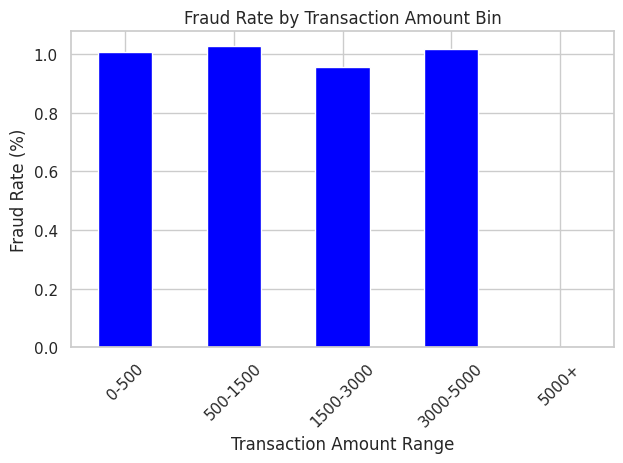

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
#amt-bi column if not existing
if 'Amount_Bin' not in df.columns:
    df['Amount_Bin'] = pd.cut(df['Amount'], bins=5)
fraud_column = 'IsFraud'
#Calculatin fraud rate by amount bin
fraud_rate = df.groupby('Amount_Bin')[fraud_column].mean() * 100
fraud_rate.plot(kind='bar', color='blue')
plt.title("Fraud Rate by Transaction Amount Bin")
plt.ylabel("Fraud Rate (%)")
plt.xlabel("Transaction Amount Range")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


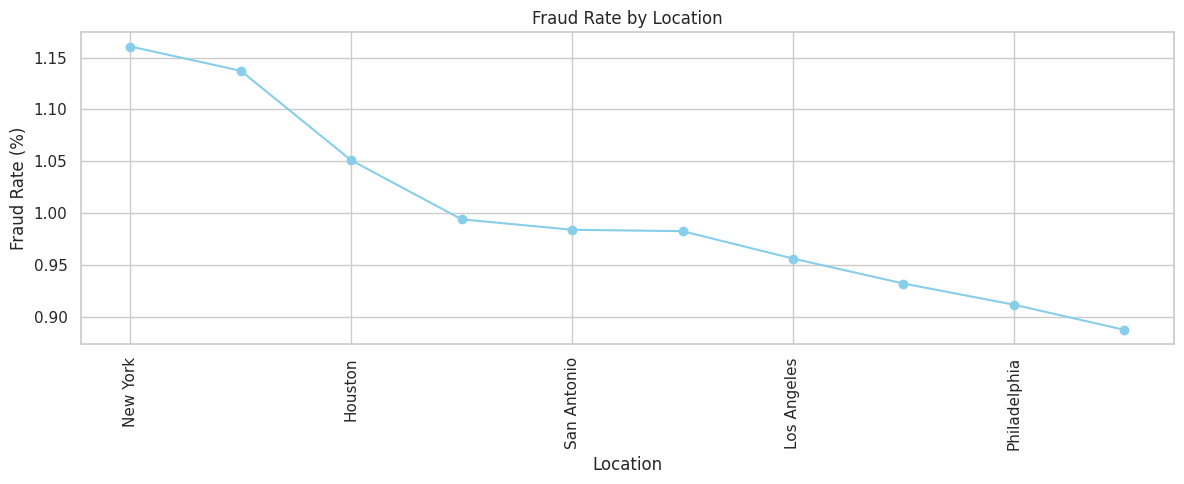

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

fraudRatePerLocation = df.groupby('Location')['IsFraud'].mean().sort_values(ascending=False) * 100
fraudRatePerLocation.plot(kind='line', figsize=(12, 5), color='skyblue', marker='o')
plt.title("Fraud Rate by Location")
plt.ylabel("Fraud Rate (%)")
plt.xlabel("Location")
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()


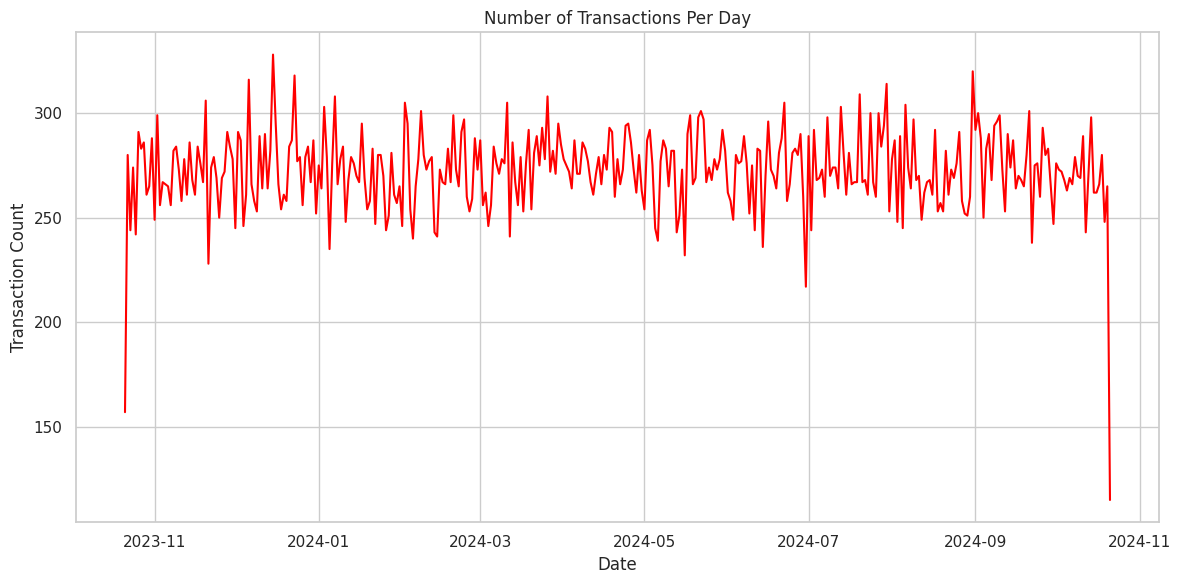

In [ ]:
#'TransactionDate' is in datetime format
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], errors='coerce')

# Group by date and count transactions
daily_txn = df.groupby(df['TransactionDate'].dt.date).size()

#line chart
plt.figure(figsize=(12,6))
daily_txn.plot(kind='line', color='red')
plt.title('Number of Transactions Per Day')
plt.xlabel('Date')
plt.ylabel('Transaction Count')
plt.grid(True)
plt.tight_layout()
plt.show()



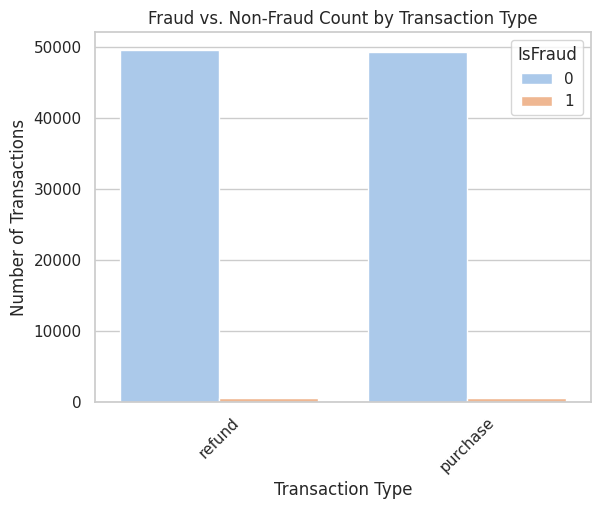

In [ ]:
# Create a count plot to compare number of fraud and non-fraud cases for each transaction type
sns.countplot(
    data=df,
    x='TransactionType',
    hue='IsFraud',
    palette='pastel'  # Soft colors for better readability
)
#title and labels
plt.title("Fraud vs. Non-Fraud Count by Transaction Type")
plt.xlabel("Transaction Type")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=45)
# plot
plt.show()


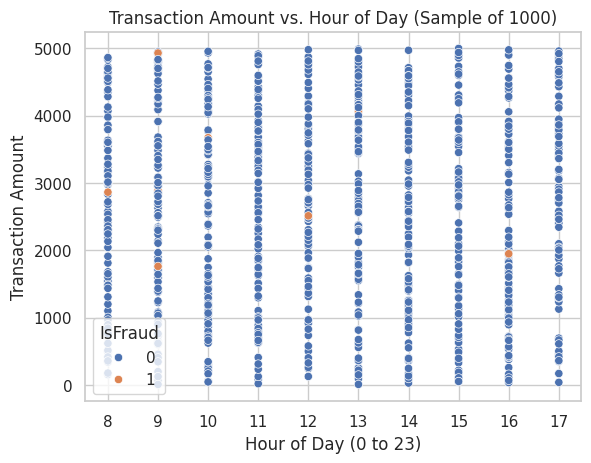

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv('/content/credit_card_fraud_dataset (1).csv')
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['Hour'] = df['TransactionDate'].dt.hour
selected_hours = [8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
df_filtered = df[df['Hour'].isin(selected_hours)]

sns.scatterplot(
    data=df_filtered.sample(1000, random_state=42),
    x='Hour',
    y='Amount',
    hue='IsFraud'
)
plt.title('Transaction Amount vs. Hour of Day (Sample of 1000)')
plt.xlabel('Hour of Day (0 to 23)')
plt.ylabel('Transaction Amount')
plt.xticks(selected_hours)
plt.show()


<ipython-input-15-35bb99651603>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
<ipython-input-15-35bb99651603>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(


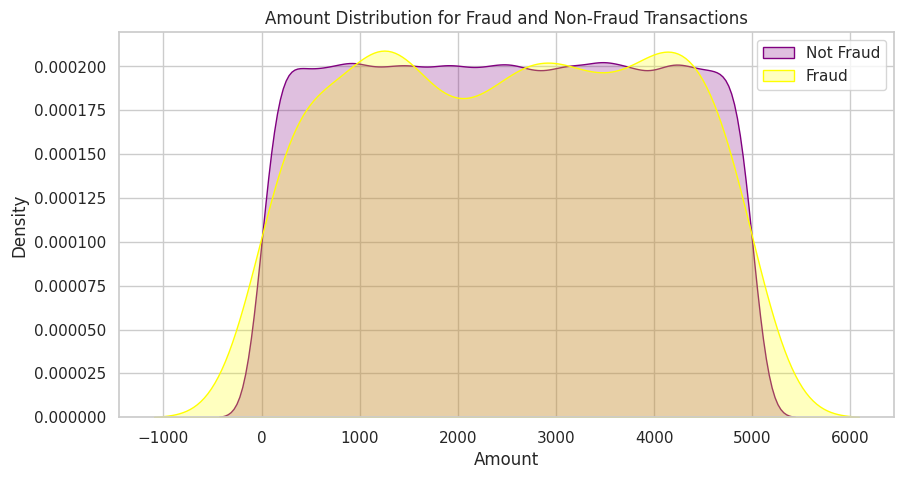

In [ ]:
#size of the plot
plt.figure(figsize=(10, 5))
# Loop through both fraud (1) and not fraud (0) labels
for fraudLabel, plotColor in zip([0, 1], ['purple', 'yellow']):

    currentData = df[df['IsFraud'] == fraudLabel]
    #KDE plot
    sns.kdeplot(
        currentData['Amount'],
        label='Fraud' if fraudLabel == 1 else 'Not Fraud',
        shade=True,
        color=plotColor
    )
plt.title("Amount Distribution for Fraud and Non-Fraud Transactions")
#plot
plt.legend()
plt.show()

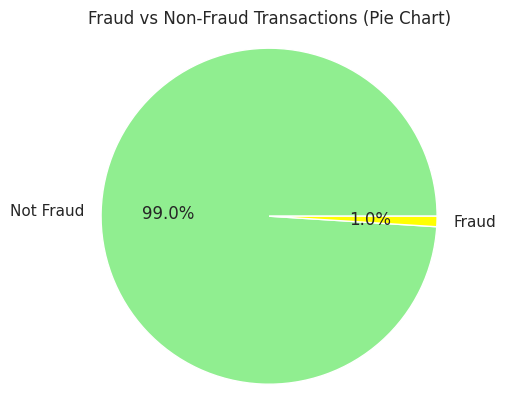

In [ ]:
fraud_counts = df['IsFraud'].value_counts()
labels = ['Not Fraud', 'Fraud']
colors = ['lightgreen', 'yellow']

plt.pie(fraud_counts, labels=labels, autopct='%1.1f%%', colors=colors, startangle=0)
plt.axis('equal')
plt.title("Fraud vs Non-Fraud Transactions (Pie Chart)")
plt.show()

<ipython-input-17-cf7cd694602d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='IsFraud', y='Amount_Scaled', data=df, palette='Set1')


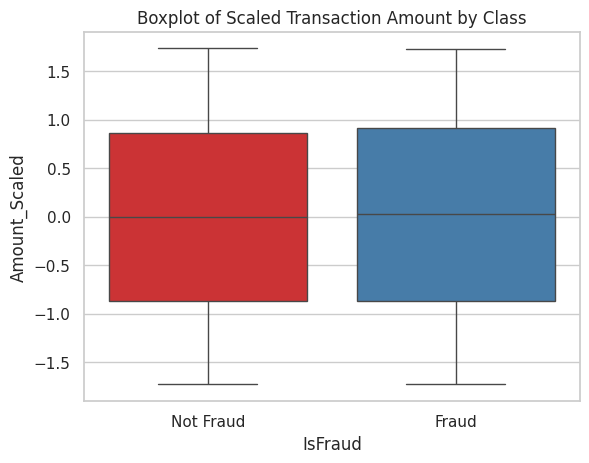

In [ ]:
if 'Amount_Scaled' not in df.columns:
    scaler = StandardScaler()
    df['Amount_Scaled'] = scaler.fit_transform(df[['Amount']])

# creatin the boxplot
sns.boxplot(x='IsFraud', y='Amount_Scaled', data=df, palette='Set1')
plt.title("Boxplot of Scaled Transaction Amount by Class")
plt.xticks([0, 1], ['Not Fraud', 'Fraud'])
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# Prepare the data
X = df[['Amount']]  # Using only 'Amount' for simplicity
y = df['IsFraud']
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=42) # Increased test_size
# Training
model = LogisticRegression()
model.fit(X_train, y_train)
# Predicting and evaluatin
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))



Accuracy: 0.9892


# ✅ Summary

We explored a real-world dataset of credit card transactions, focusing on identifying fraud trends using data preprocessing and visualization.

### Key Insights:
- Fraud cases are extremely rare.
- Average fraud amounts differ from non-fraud.
- Time and amount bins reveal interesting fraud patterns.
- Some features show promising separation between fraud and non-fraud.

This project sets the foundation for building future fraud detection systems using machine learning.
